In [5]:
# Importing dependencies
import numpy as np
from PIL import Image
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from config import db_url

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import psycopg2
import sqlalchemy
import pandas as pd

In [6]:
# Create connection to database
from sqlalchemy import create_engine
engine = create_engine(f'{db_url}')
connection = engine.connect()

# Reading SQL tables into dataframes
data_df = pd.read_sql('select * from data_clean', connection)

In [7]:
# Assign job_title to variable
job_title_col = data_df["job_title"]

# Extract unique list of job titles
job_titles = pd.unique(job_title_col)

# Combine all job titles into one big text
word_cloud_text = " ".join(job_title for job_title in job_titles)

In [8]:
# Create function to swap numbers 0 to 255 (white)
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [9]:
# Import PNG mask
mask = np.array(Image.open("Images/magnifying_glass.png"))
    
# Transform mask
transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

# for i in range(len(mask)):
#     transformed_mask[i] = list(map(transform_format, mask[i]))

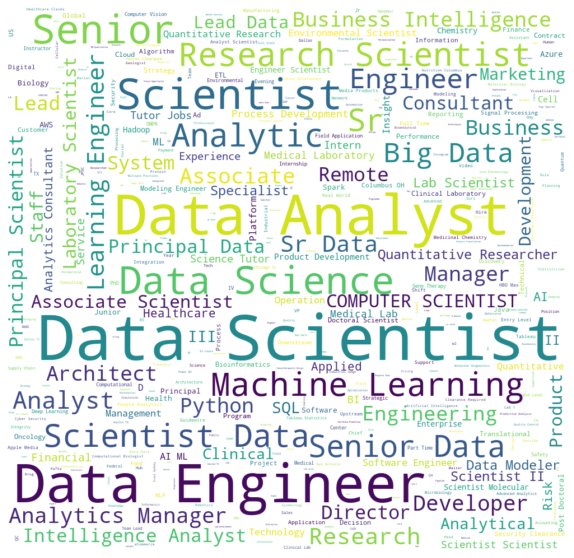

In [9]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_mask,
               contour_width=3, contour_color='black')

# Generate a wordcloud
wc.generate(word_cloud_text)

# Store to file
wc.to_file("Images/word_cloud.png")

# Show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()